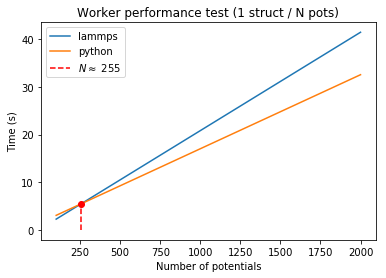

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("2000_timing_tests.dat")

x = data[:,0]
lammpsy = data[:,1]
pythony = data[:,2]

A = np.ones((len(data), 2))
A[:,1] = x.copy()

lammpsb, lammpsm = np.linalg.lstsq(A, lammpsy)[0]
pythonb, pythonm = np.linalg.lstsq(A, pythony)[0]

intersection = (pythonb - lammpsb)/(lammpsm - pythonm)

lammpsf = lambda x: lammpsb + lammpsm*x
pythonf = lambda x: pythonb + pythonm*x

xplotting = np.linspace(data[0,0], data[len(data)-1,0], num=1000)
lammpsfit = np.array(list(map(lammpsf, xplotting)))
pythonfit = np.array(list(map(pythonf, xplotting)))

diff = lammpsfit - pythonfit

plt.figure()
plt.title("Worker performance test (1 struct / N pots)")
plt.plot(xplotting, lammpsfit, '-', label='lammps')
plt.plot(xplotting, pythonfit, '-', label='python')
plt.plot((intersection, intersection), (0, lammpsf(intersection)), '--r',
         label=r'$N \approx$ {0}'.format(int(intersection)))
plt.plot(intersection, lammpsf(intersection), 'ro')
plt.xlabel("Number of potentials")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

#plt.figure()
#plt.title("Worker performance test (1 struct / N pots)")
#plt.plot(xplotting, diff)
#plt.show()